## Diabetes Prediction ML Project

### Life Cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Choose Best Model

### 1) Problem Statement
Diabetes is one of the important public health challenges that require early and accurate identification of risk to improve patient outcomes and reduce healthcare costs. The project aims to deliver a predictive model developed on patient demographic data, lifestyle habits, family history, and clinically validated risk indicators to identify persons at higher risk for diabetes. This will help in early screening, targeted interventions, and data-driven clinical decision-making in healthcare settings.

### 2) Data Collection
Dataset Source -> https://www.kaggle.com/datasets/mohankrishnathalla/diabetes-health-indicators-dataset/data

##### 2.1 Importing Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
sns.set(style = 'whitegrid', palette = 'muted', font_scale = 1.1)

##### Loading Data

In [3]:
df = pd.read_csv("/content/diabetes_dataset.csv")

##### Showing Top 5 Records

In [4]:
df.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   
2                                  57         6.4                 10.0   
3                                  49         3.4                  6.6   
4                                 109         7.2                  7.4   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   
2                        8.1                        1                     0   
3                        5.2                        0                     0   
4                        5.0                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   
2                       0  22.2                0.81          115   
3                       0  26.8                0.88          120   
4                       0  21.2                0.78           92   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   
2            73          74                213               66   
3            93          68                171               50   
4            67          67                210               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diabetes_risk_score diabetes_stage  \
0           6.36   8.18                 29.6         Type 2   
1           2.00   5.63                 23.0    No Diabetes   
2           5.07   7.51                 44.7         Type 2   
3           5.28   9.03                 38.2         Type 2   
4          12.74   7.20                 23.5         Type 2   

   diagnosed_diabetes  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1

##### Shape of Dataset

In [5]:
df.shape

(100000, 31)

##### 2.2 Dataset Info

| Rows | Columns |
| ---  | ---:     |
| 100000 | 31    |

| Column | Type | Description | Values/Range |
| ---    | ---  | ---         | ---:          |
| age    | Integer | Age of patient in years | 18–90 |
| gender | String | Patient gender | 'Male', 'Female', 'Other' |
| ethnicity | String | Ethnic background | 'White', 'Hispanic', 'Black', 'Asian', 'Other' |
| education_level | String | Highest completed education | 'No formal', 'Highschool', 'Graduate', 'Postgraduate' |
| income_level | String | Income category | 'Low', 'Medium', 'High' |
| employment_status | String | Employment type | 'Employed', 'Unemployed', 'Retired', 'Student' |
| smoking_status | String | Smoking behavior | 'Never', 'Former', 'Current' |
| alcohol_consumption_per_week | Float | Drinks consumed per week | 0–10 |
| physical_activity_minutes_per_week | Integer | Physical activity (weekly minutes) | 0–850 |
| diet_score | Integer | Diet quality (higher = healthier) | 0–10 |
| sleep_hours_per_day | Float | Average daily sleep hours | 3–12 |
| screen_time_hours_per_day | Float | Average daily screen time hours | 0–12 |
| family_history_diabetes | Integer | Family history of diabetes | 0 = No, 1 = Yes |
| hypertension_history | Integer | Hypertension history | 0 = No, 1 = Yes |
| cardiovascular_history | Integer | Cardiovascular history | 0 = No, 1 = Yes |
| bmi | Float | Body Mass Index (kg/m²) | 15–45 |
| waist_to_hip_ratio | Float | Waist-to-hip ratio | 0.7–1.2 |
| systolic_bp | Integer | Systolic blood pressure (mmHg) | 90–180 |
| diastolic_bp | Integer | 	Diastolic blood pressure (mmHg) | 60–120 |
| heart_rate | Integer | Resting heart rate (bpm) | 50–120 |
| cholesterol_total | Float | Total cholesterol (mg/dL) | 120–300 |
| hdl_cholesterol | Float | HDL cholesterol (mg/dL) | 20–100 |
| ldl_cholesterol | Float | LDL cholesterol (mg/dL) | 50–200 |
| triglycerides | Float | Triglycerides (mg/dL) | 50–500 |
| glucose_fasting | Float | Fasting glucose (mg/dL) | 70–250 |
| glucose_postprandial | Float | Post-meal glucose (mg/dL) | 90–350 |
| insulin_level | Float | Blood insulin level (µU/mL) | 2–50 |
| hba1c | Float | HbA1c (%) | 4–14 |
| diabetes_risk_score | Integer | Risk score (calculated, 0–100) | 0–100 |
| diabetes_stage | String | Stage of diabetes | 'No Diabetes', 'Pre-Diabetes', 'Type 1', 'Type 2', 'Gestational' |
| diagnosed_diabetes | Integer | Target: Diabetes diagnosis | 0 = No, 1 = Yes |



###### Dropping "diabetes_risk_score" & "diabetes_stage" columns

In [6]:
df1 = df.drop(["diabetes_risk_score", "diabetes_stage"], axis=1)
df1.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   
2                                  57         6.4                 10.0   
3                                  49         3.4                  6.6   
4                                 109         7.2                  7.4   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   
2                        8.1                        1                     0   
3                        5.2                        0                     0   
4                        5.0                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   
2                       0  22.2                0.81          115   
3                       0  26.8                0.88          120   
4                       0  21.2                0.78           92   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   
2            73          74                213               66   
3            93          68                171               50   
4            67          67                210               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diagnosed_diabetes  
0           6.36   8.18                   1  
1           2.00   5.63                   0  
2           5.07   7.51                   1  
3           5.28   9.03                   1  
4          12.74   7.20                   1

### 3) Data Checks to Perform
- Check Missing Values
- Check Duplicates
- Check Data Types
- Check No.of Unique Values of Each Column
- Check Statistics of Dataset
- Check Various Categories Present in Different Categorical Columns

##### 3.1 Check Missing Values

##### Missing Value Summary

In [7]:
missing_summary = pd.DataFrame({
    'missing_count': df1.isnull().sum(),
    'missing_percentage': (df1.isnull().sum() / len(df1)) * 100
}).sort_values(by='missing_percentage', ascending=False)

missing_summary

missing_count  missing_percentage
age                                             0                 0.0
gender                                          0                 0.0
ethnicity                                       0                 0.0
education_level                                 0                 0.0
income_level                                    0                 0.0
employment_status                               0                 0.0
smoking_status                                  0                 0.0
alcohol_consumption_per_week                    0                 0.0
physical_activity_minutes_per_week              0                 0.0
diet_score                                      0                 0.0
sleep_hours_per_day                             0                 0.0
screen_time_hours_per_day                       0                 0.0
family_history_diabetes                         0                 0.0
hypertension_history                            0                 0.0
cardiovascular_history                          0                 0.0
bmi                                             0                 0.0
waist_to_hip_ratio                              0                 0.0
systolic_bp                                     0                 0.0
diastolic_bp                                    0                 0.0
heart_rate                                      0                 0.0
cholesterol_total                               0                 0.0
hdl_cholesterol                                 0                 0.0
ldl_cholesterol                                 0                 0.0
triglycerides                                   0                 0.0
glucose_fasting                                 0                 0.0
glucose_postprandial                            0                 0.0
insulin_level                                   0                 0.0
hba1c                                           0                 0.0
diagnosed_diabetes                              0                 0.0

##### Visualizing Missingness Pattern

In [8]:
# (df1.isnull().mean() * 100).sort_values(ascending=False).plot(kind='bar')
# plt.ylabel('Missing Percentage')
# plt.title('Missing Data Percentage by Feature')

##### 3.2 Check Duplicates

In [9]:
df1.duplicated().sum()

np.int64(0)

##### 3.3 Check Data Types

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

##### 3.4 Check No.of Unique Values of Each Column

In [11]:
df1.nunique()

age                                     73
gender                                   3
ethnicity                                5
education_level                          4
income_level                             5
employment_status                        4
smoking_status                           3
alcohol_consumption_per_week            11
physical_activity_minutes_per_week     620
diet_score                             101
sleep_hours_per_day                     71
screen_time_hours_per_day              156
family_history_diabetes                  2
hypertension_history                     2
cardiovascular_history                   2
bmi                                    240
waist_to_hip_ratio                      40
systolic_bp                             86
diastolic_bp                            60
heart_rate                              64
cholesterol_total                      210
hdl_cholesterol                         79
ldl_cholesterol                        190
triglycerides                          262
glucose_fasting                        109
glucose_postprandial                   210
insulin_level                         2350
hba1c                                  548
diagnosed_diabetes                       2
dtype: int64

##### 3.5 Check Statistics of Dataset

In [12]:
df1.describe()

age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%                             57.000000       4.800000             6.300000   
50%                            100.000000       6.000000             7.000000   
75%                            160.000000       7.200000             7.700000   
max                            833.000000      10.000000            10.000000   

       screen_time_hours_per_day  family_history_diabetes  \
count              100000.000000            100000.000000   
mean                    5.996468                 0.219410   
std                     2.468406                 0.413849   
min                     0.500000                 0.000000   
25%                     4.300000                 0.000000   
50%                     6.000000                 0.000000   
75%                     7.700000                 0.000000   
max                    16.800000                 1.000000   

       hypertension_history  cardiovascular_history            bmi  \
count         100000.000000           100000.000000  100000.000000   
mean               0.250800                0.079200      25.612653   
std                0.433476                0.270052       3.586705   
min                0.000000                0.000000      15.000000   
25%                0.000000                0.000000      23.200000   
50%                0.000000                0.000000      25.600000   
75%                1.000000                0.000000      28.000000   
max                1.000000                1.000000      39.200000   

       waist_to_hip_ratio    systolic_bp  diastolic_bp     heart_rate  \
count       100000.000000  100000.000000  100000.00000  100000.000000   
mean             0.856078     115.799610      75.23249      69.632870   
std              0.046837      14.284073       8.20425       8.371954   
min              0.670000      90.000000      50.00000      40.000000   
25%              0.820000     106.000000      70.00000      64.000000   
50%              0.860000     116.000000      75.00000      70.000000   
75%              0.890000     125.000000      81.00000      75.000000   
max              1.060000     179.000000     110.00000     105.000000   

       cholesterol_total  hdl_cholesterol  ldl_cholesterol  triglycerides  \
count      100000.000000    100000.000000    100000.000000  100000.000000   
mean          185.978110        54.042790       103.000430     121.462650   
std            32.013005        10.267374        33.390256      43.372619   
min           100.000000        20.000000        50.000000      30.000000   
25%           164.000000        47.000000        78.000000      91.000000   
50%           186.000000        54.000000       102.000000     121.000000   
75%           208.000000        61.000000       126.000000     151.000000   
max           318.000000        98.000000       263.000000     344.000000   

       glucose_fasting  glucose_postprandial  insulin_level          hba1c  \
count     100000.00000         100000.000000  100000.000000  100000.000000   
mean         111.11712            160.035050       9.061242       6.520776   
std           13.59561             30.935

##### 3.6 Check Various Categories Present in Different Categorical Columns

In [13]:
print("Different Categories in Gender Column : ", df1['gender'].unique())
print("Different Categories in Ethnicity Column : ", df1['ethnicity'].unique())
print("Different Categories in Education Level Column : ", df1['education_level'].unique())
print("Different Categories in Income Level Column : ", df1['income_level'].unique())
print("Different Categories in Employment Status Column : ", df1['employment_status'].unique())
print("Different Categories in Smoking Status Column : ", df1['smoking_status'].unique())
print("Different Categories in Alcohol Consumption Per Week Column : ", df1['alcohol_consumption_per_week'].unique())
print("Different Categories in Family History Diabetes Column : ", df1['family_history_diabetes'].unique())
print("Different Categories in Hypertension History Column : ", df1['hypertension_history'].unique())
print("Different Categories in Cardiovascular History Column : ", df1['cardiovascular_history'].unique())
print("Different Categories in Diagnosed Diabetes Column : ", df1['diagnosed_diabetes'].unique())


Different Categories in Gender Column :  ['Male' 'Female' 'Other']
Different Categories in Ethnicity Column :  ['Asian' 'White' 'Hispanic' 'Black' 'Other']
Different Categories in Education Level Column :  ['Highschool' 'Graduate' 'Postgraduate' 'No formal']
Different Categories in Income Level Column :  ['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']
Different Categories in Employment Status Column :  ['Employed' 'Unemployed' 'Retired' 'Student']
Different Categories in Smoking Status Column :  ['Never' 'Former' 'Current']
Different Categories in Alcohol Consumption Per Week Column :  [ 0  1  2  3  6  5  4  9  8  7 10]
Different Categories in Family History Diabetes Column :  [0 1]
Different Categories in Hypertension History Column :  [0 1]
Different Categories in Cardiovascular History Column :  [0 1]
Different Categories in Diagnosed Diabetes Column :  [1 0]


##### 3.7 Extracting Numerical & Categorical columns

In [14]:
cat_cols = df1.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'ethnicity', 'education_level', 'income_level',
       'employment_status', 'smoking_status'],
      dtype='object')

In [15]:
num_cols = df1.select_dtypes(exclude='object').drop('diagnosed_diabetes', axis=1).columns
num_cols

Index(['age', 'alcohol_consumption_per_week',
       'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day',
       'family_history_diabetes', 'hypertension_history',
       'cardiovascular_history', 'bmi', 'waist_to_hip_ratio', 'systolic_bp',
       'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol',
       'ldl_cholesterol', 'triglycerides', 'glucose_fasting',
       'glucose_postprandial', 'insulin_level', 'hba1c'],
      dtype='object')

In [16]:
binary_cols = ["family_history_diabetes", "hypertension_history", "cardiovascular_history", "alcohol_consumption_per_week"]
binary_cols

['family_history_diabetes',
 'hypertension_history',
 'cardiovascular_history',
 'alcohol_consumption_per_week']

In [17]:
num_cols_viz = num_cols[~num_cols.isin(binary_cols)]
num_cols_viz

Index(['age', 'physical_activity_minutes_per_week', 'diet_score',
       'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi',
       'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate',
       'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol',
       'triglycerides', 'glucose_fasting', 'glucose_postprandial',
       'insulin_level', 'hba1c'],
      dtype='object')

#### Insights
- There are no missing values in dataset.
- There are no duplicate values.

In [18]:
df1['diagnosed_diabetes'].value_counts()

diagnosed_diabetes
1    59998
0    40002
Name: count, dtype: int64

In [19]:
df1['diagnosed_diabetes'].value_counts(normalize=True) * 100

diagnosed_diabetes
1    59.998
0    40.002
Name: proportion, dtype: float64

#### Insight
- 1 (Diabetes): 60%
- 0 (No diabetes): 40%

Dataset is close to balanced, so we do not need to worry about bias towards one class.

### 4) Exploratory Data Analysis

##### 4.1 UniVariate Analysis

##### 4.1.1 Numerical UniVariate Analysis

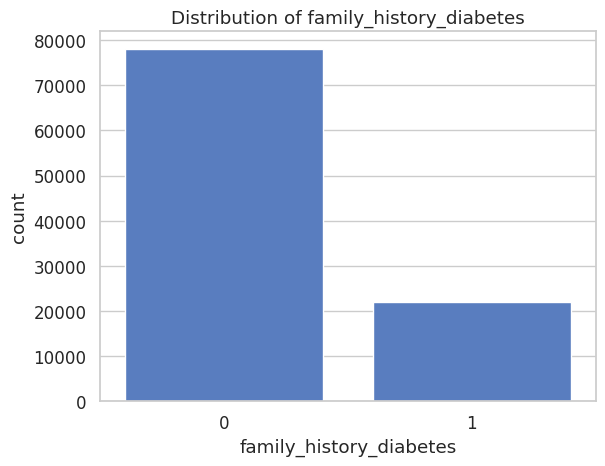

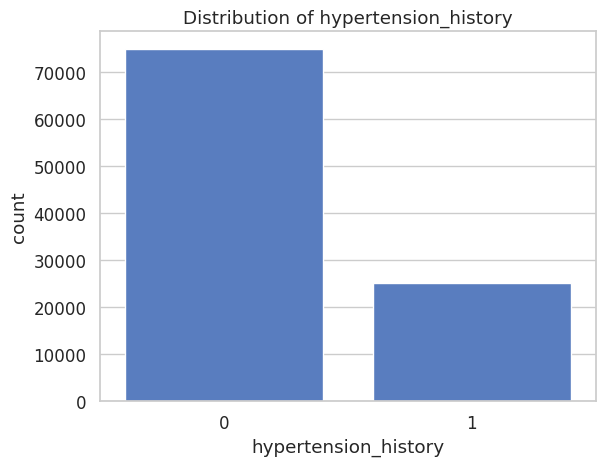

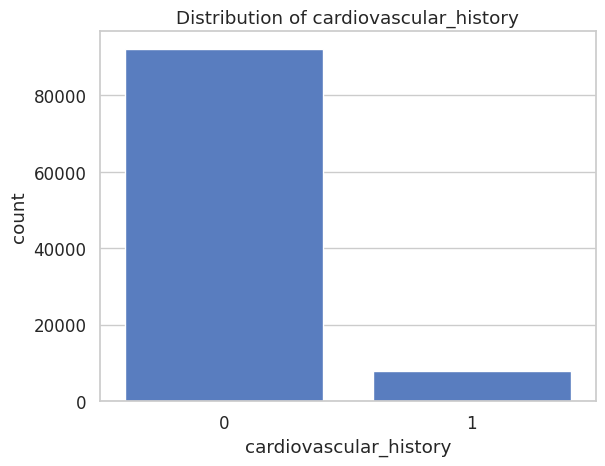

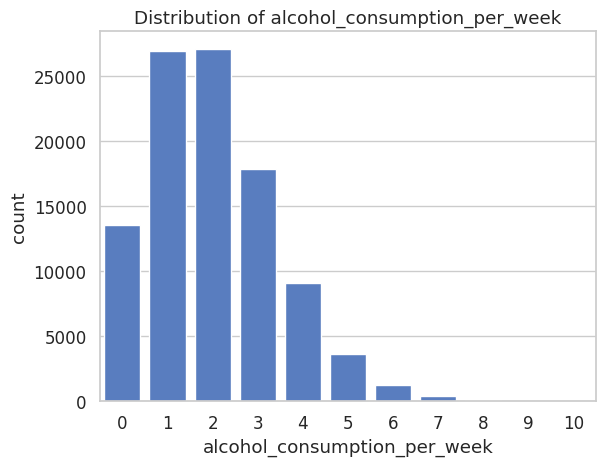

In [20]:
for col in binary_cols:
  sns.countplot(data=df1, x=col)
  plt.title(f"Distribution of {col}")
  plt.show()

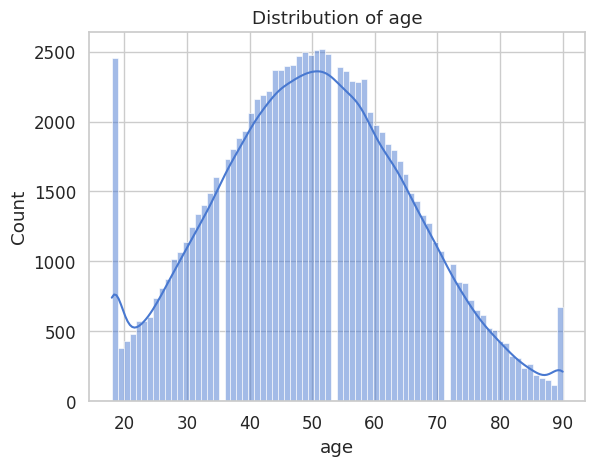

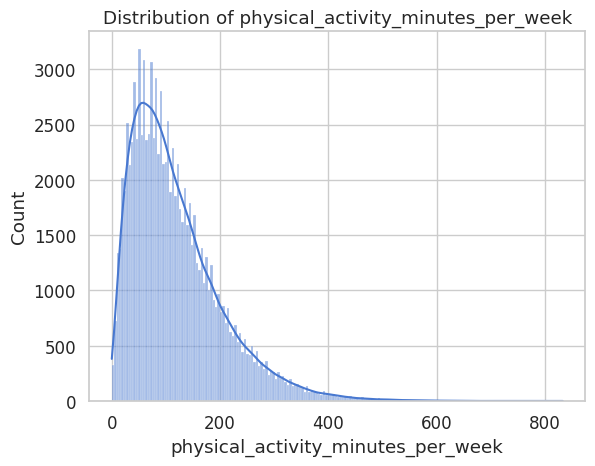

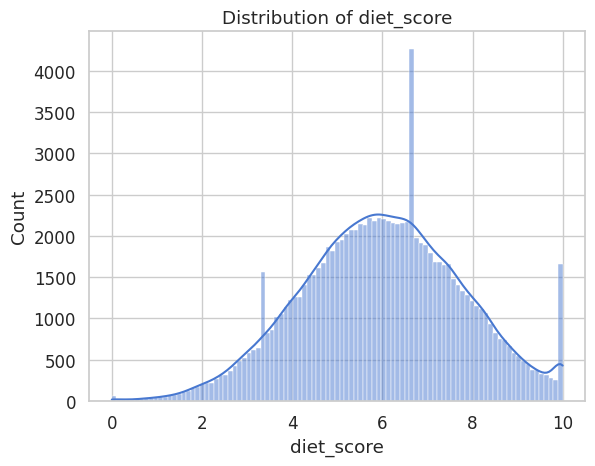

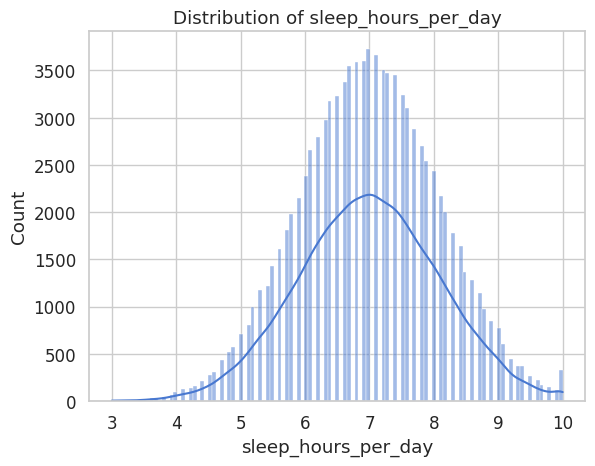

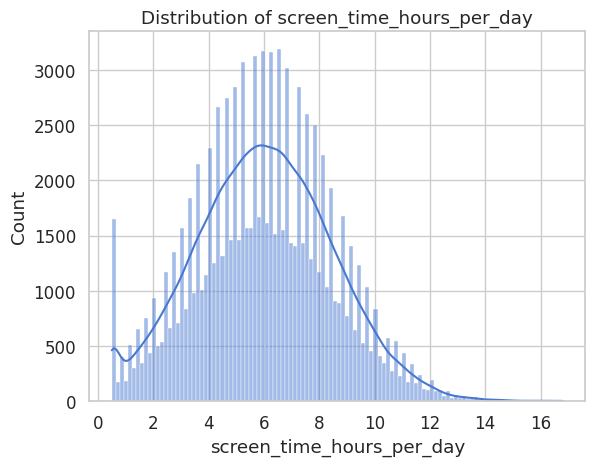

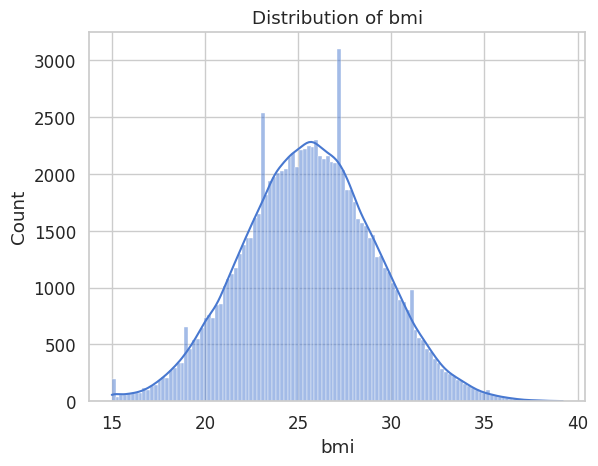

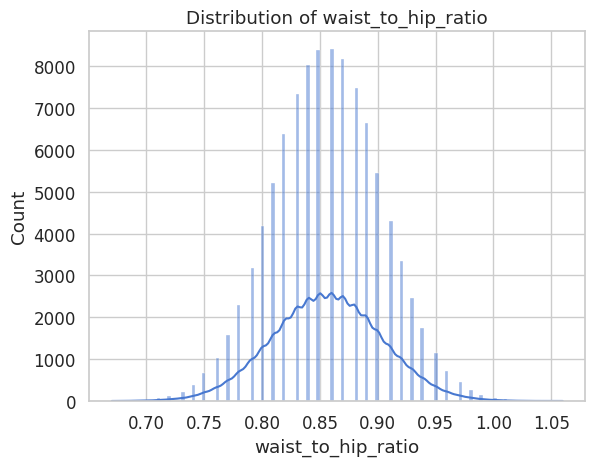

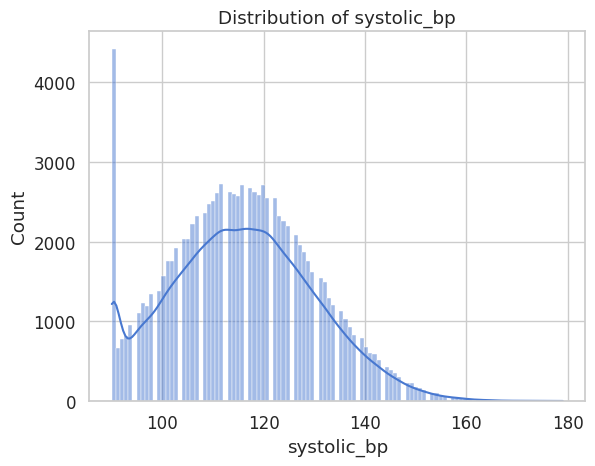

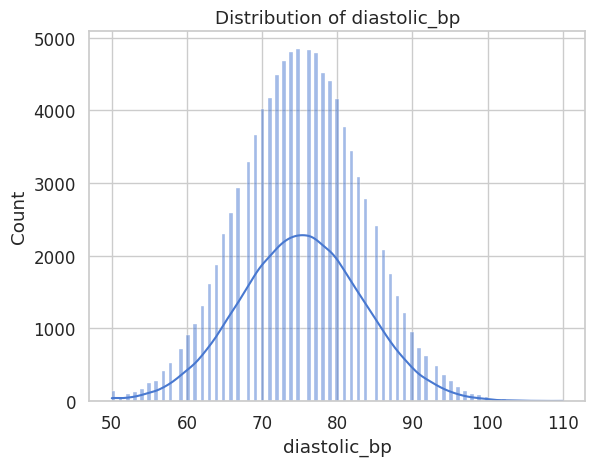

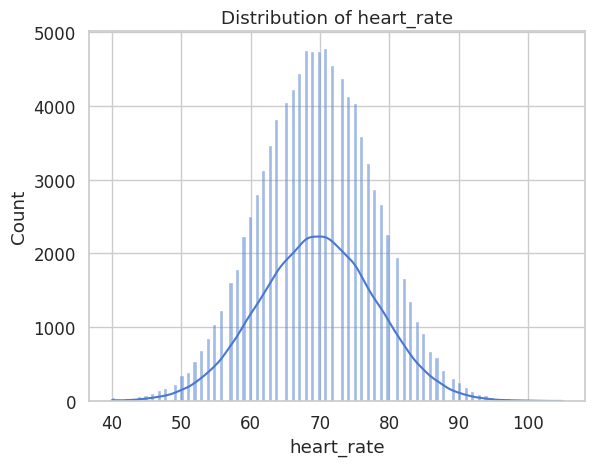

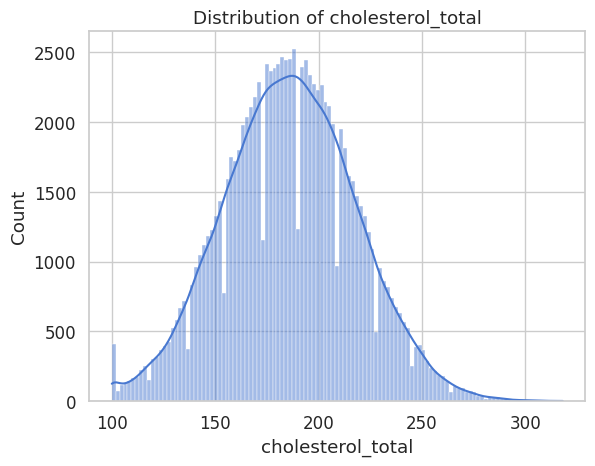

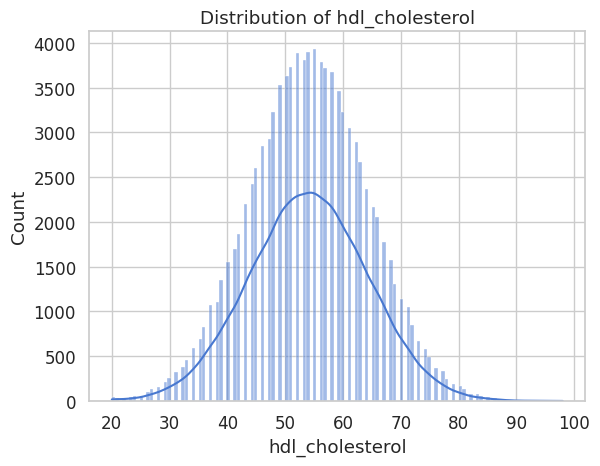

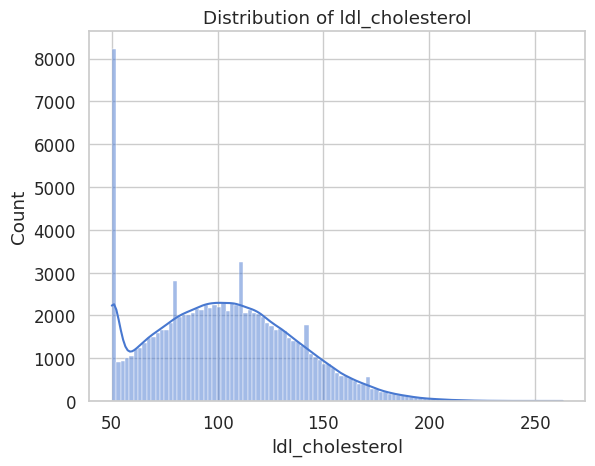

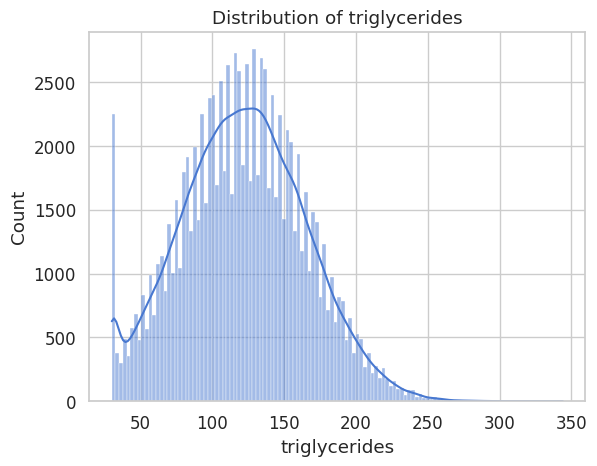

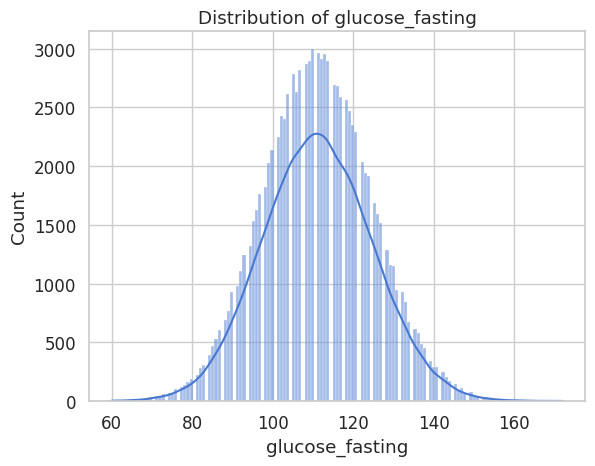

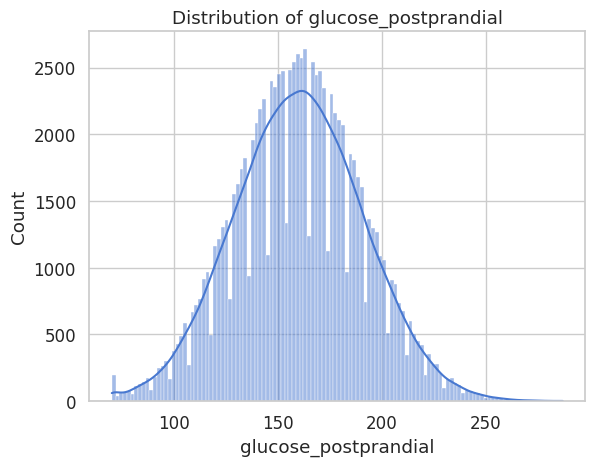

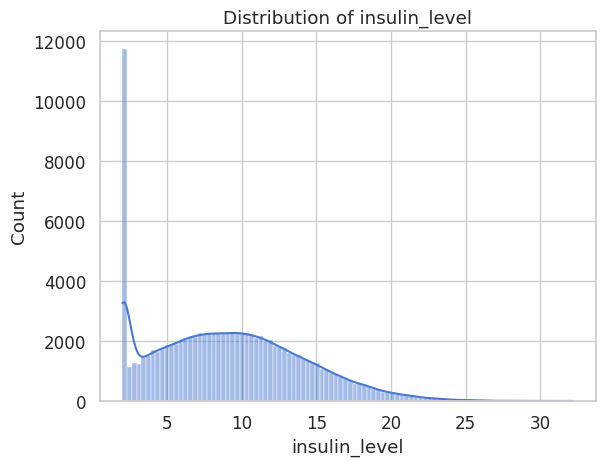

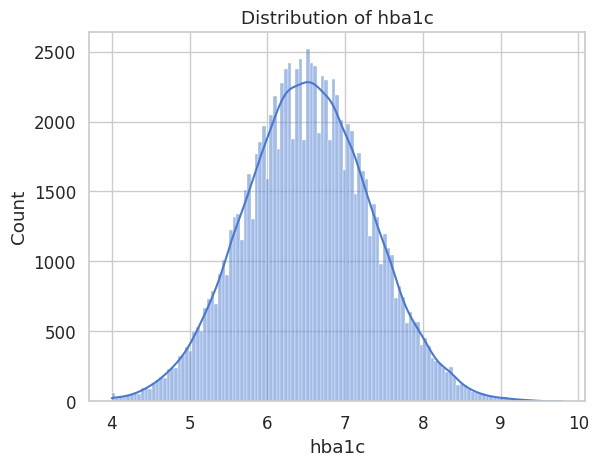

In [21]:
for col in num_cols_viz:
  sns.histplot(data=df1, x=col, kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

##### Bar Plot Function

In [22]:
def bar_plot(df,col,bins,labels):
  pd.cut(df[col], bins=bins, labels=labels).value_counts().sort_index().plot(kind='bar')
  plt.xlabel(f'{col}')
  plt.ylabel('No.of Individuals')
  plt.title(f'Distribution of {col}')
  plt.show()

##### Histogram Function

In [23]:
def hist_func(df,col,bins):
  sns.histplot(data=df, x=col, bins=bins, kde=True)
  plt.xlabel(f'{col}')
  plt.ylabel('No.of Individuals')
  plt.title(f'Distribution of {col}')
  plt.show()

#### Age

In [24]:
bins = [18, 30, 40, 50, 60, 70, float('inf')]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']

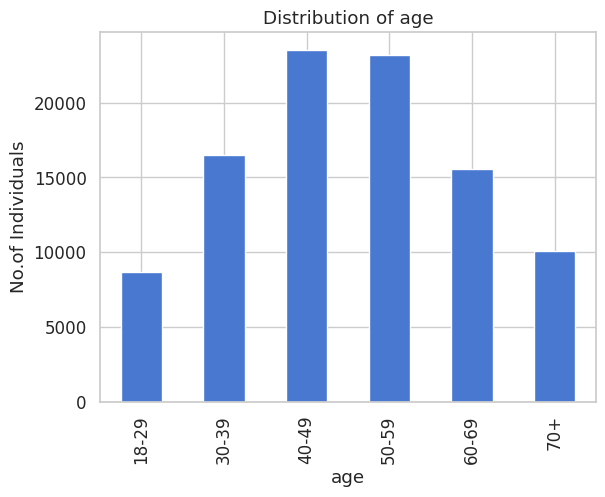

In [25]:
bar_plot(df1,'age',bins,labels)

#### Physical Activity Minutes Per Week

In [26]:
bins = [0, 150, 300, df1['physical_activity_minutes_per_week'].max()]
labels = ['Low (<150)', 'Moderate (150-300)', 'High (>300)']

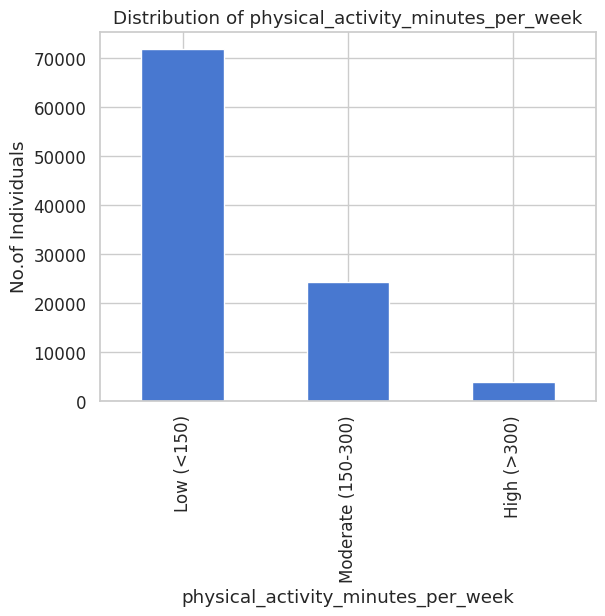

In [27]:
bar_plot(df1,'physical_activity_minutes_per_week',bins,labels)

#### Diet Score

In [28]:
bins = [0, 4, 7, 11]
labels = ['Poor', 'Moderate', 'Good']

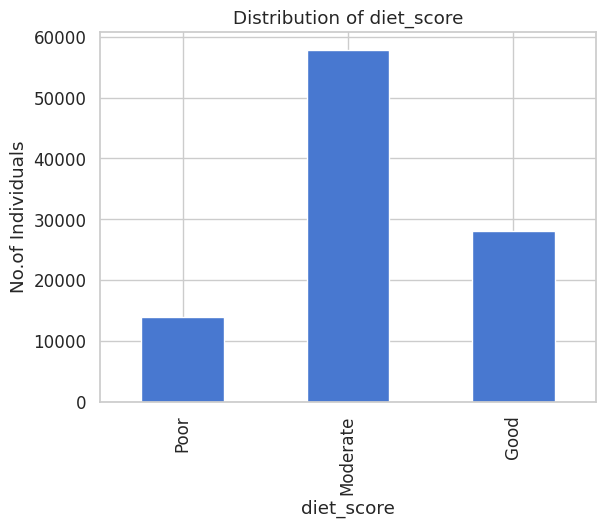

In [29]:
bar_plot(df1,'diet_score',bins,labels)

#### Daily Sleep Duration

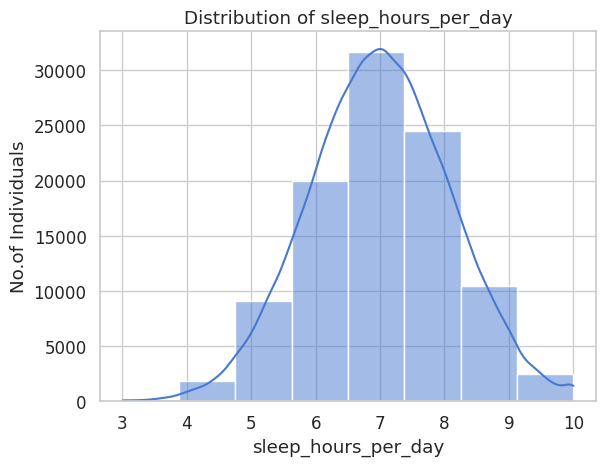

In [30]:
hist_func(df1,'sleep_hours_per_day',8)

#### Screen Hours Per Day

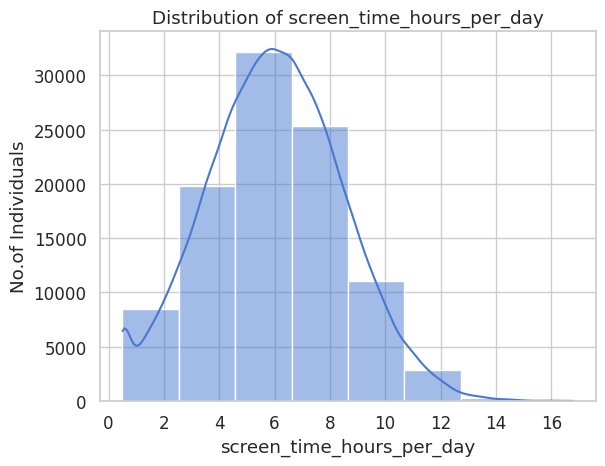

In [31]:
hist_func(df1,'screen_time_hours_per_day',8)

In [32]:
bins = [0, 2, 5, 8, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High']

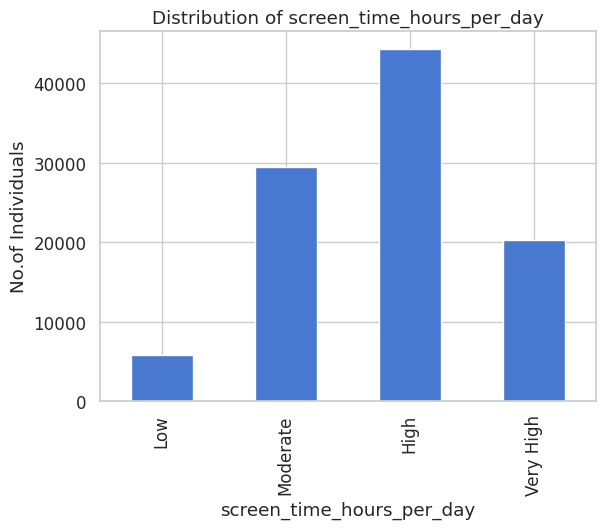

In [33]:
bar_plot(df1,'screen_time_hours_per_day',bins,labels)

#### BMI

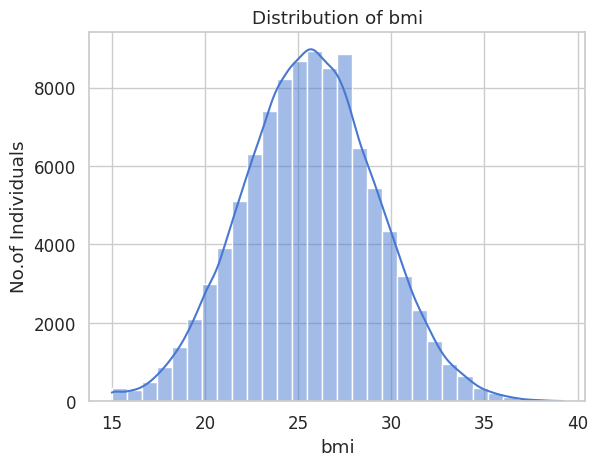

In [34]:
hist_func(df1,'bmi',30)

In [35]:
bins = [0, 18.5, 25, 30, 35, 40]
labels = ['Underweight', 'Normal', 'Overweight', 'Obesity 1', 'Obesity 2']

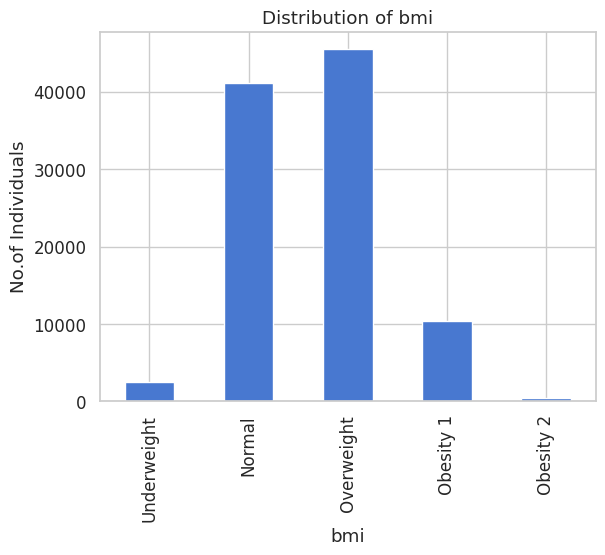

In [36]:
bar_plot(df1,'bmi',bins,labels)

#### Waist to Hip Ratio

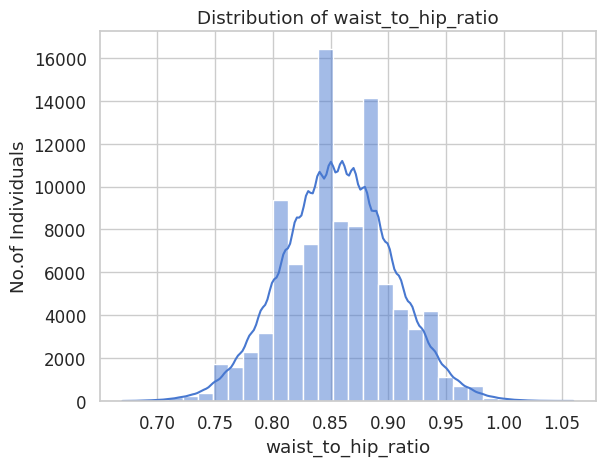

In [37]:
hist_func(df1,'waist_to_hip_ratio',30)

In [38]:
bins = [0, 0.85, 0.90, float('inf')]
labels = ['Low', 'Moderate', 'High']

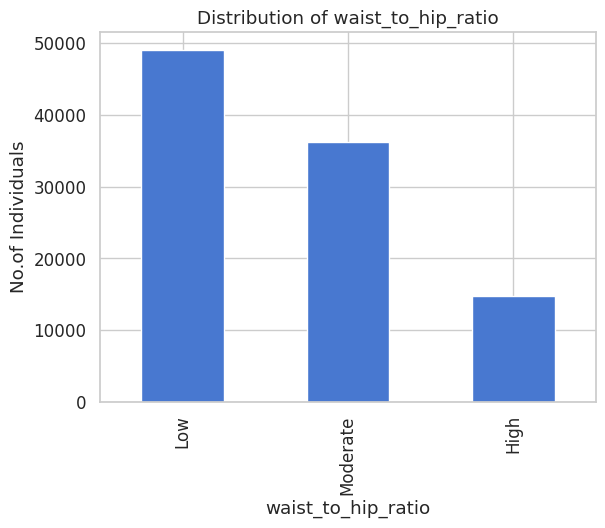

In [39]:
bar_plot(df1,'waist_to_hip_ratio',bins,labels)

#### Systolic BP

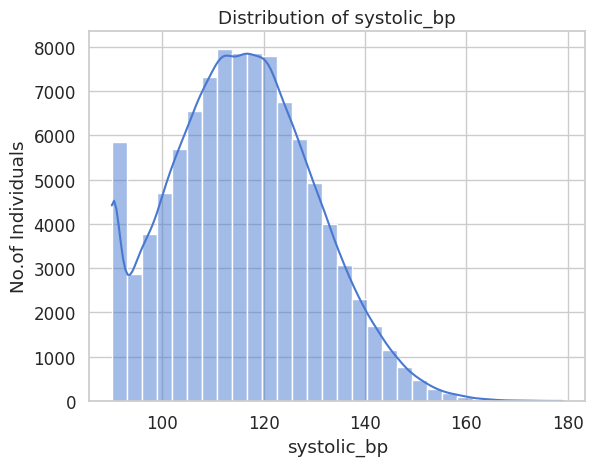

In [40]:
hist_func(df1,'systolic_bp',30)

#### Diastolic BP

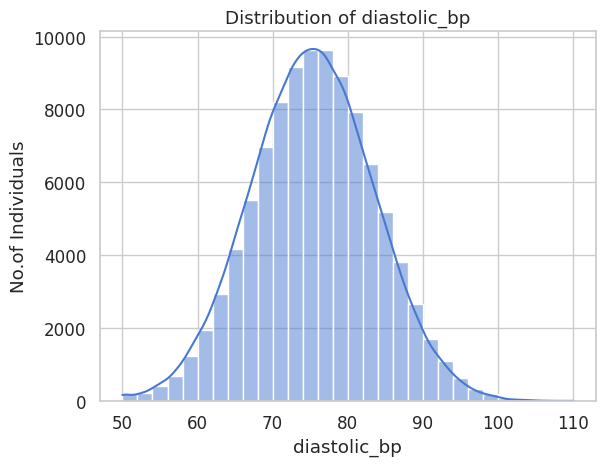

In [41]:
hist_func(df1,'diastolic_bp',30)

#### Heart Rate

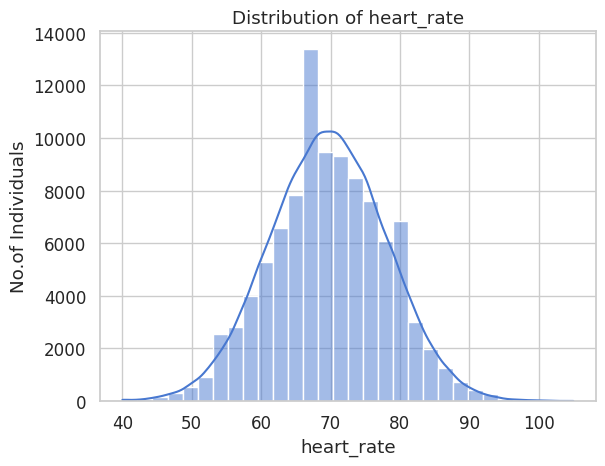

In [42]:
hist_func(df1,'heart_rate',30)

#### Cholesterol Total

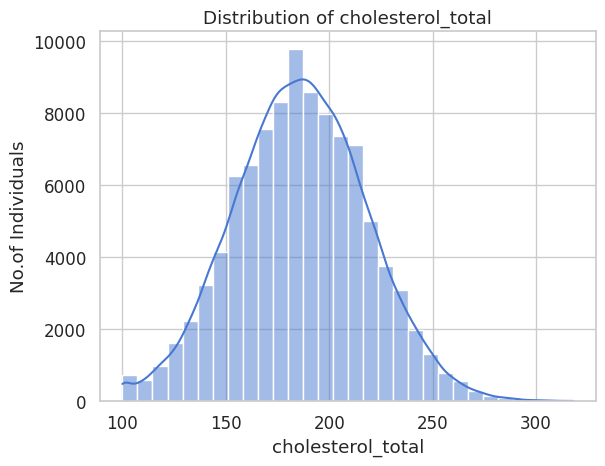

In [43]:
hist_func(df1,'cholesterol_total',30)

#### HDL Cholesterol

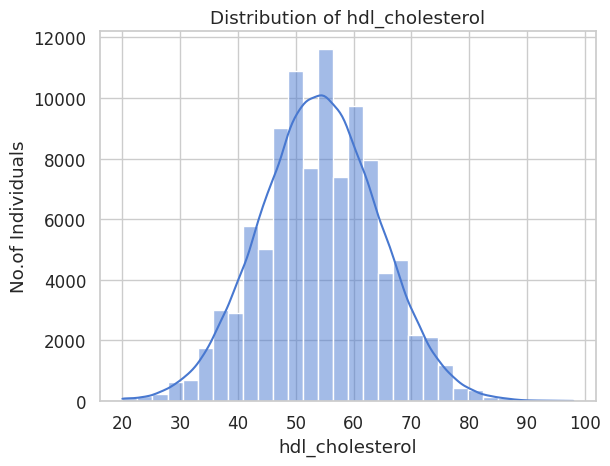

In [44]:
hist_func(df1,'hdl_cholesterol',30)

#### LDL Cholesterol

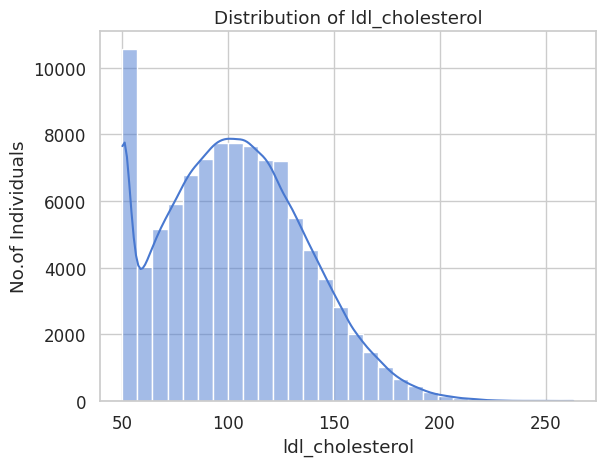

In [45]:
hist_func(df1,'ldl_cholesterol',30)

In [46]:
bins = [0, 100, 130, 160, 190, float('inf')]
labels = ['Optimal', 'Near Optimal', 'Borderline High', 'High', 'Very High']

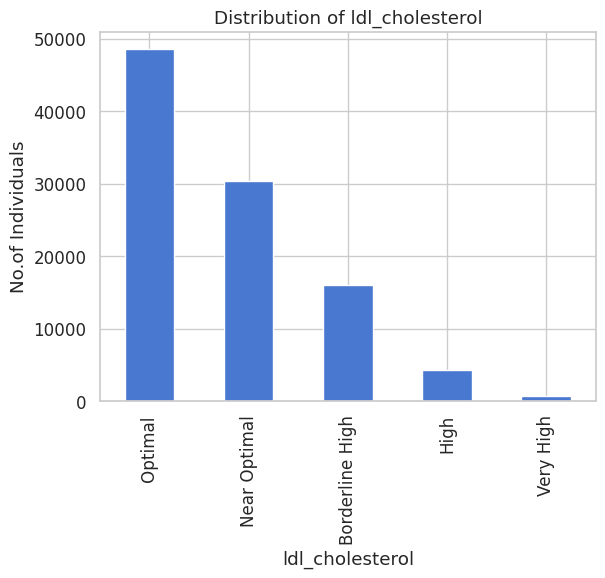

In [47]:
bar_plot(df1,'ldl_cholesterol',bins,labels)

#### Triglycerides

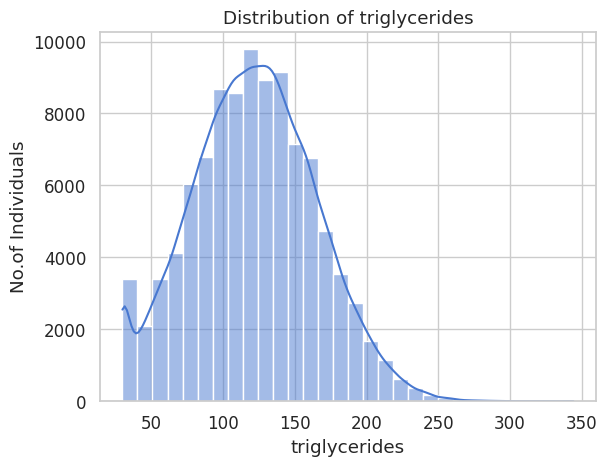

In [48]:
hist_func(df1,'triglycerides',30)

#### Glucose Fasting

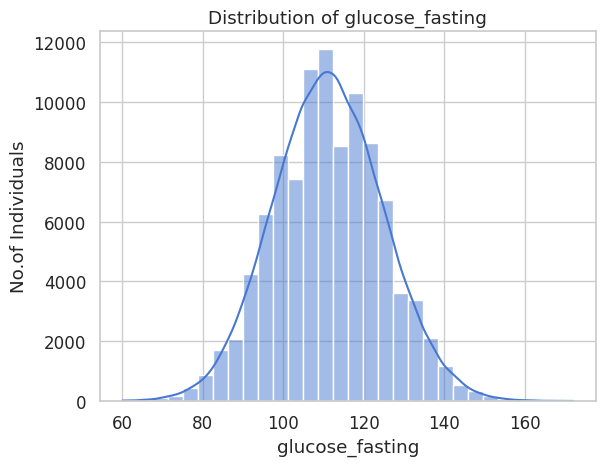

In [49]:
hist_func(df1,'glucose_fasting',30)

#### Glucose Postprandial

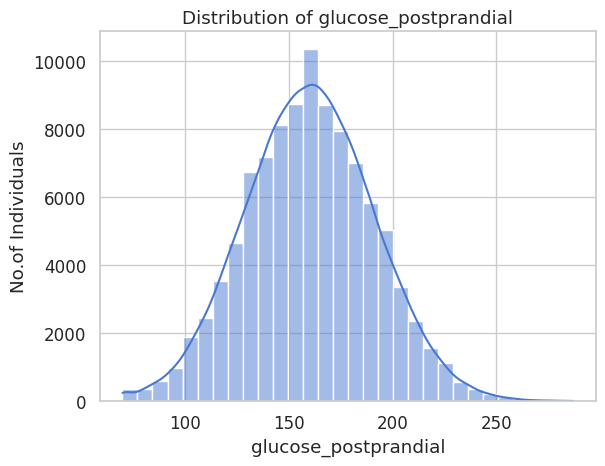

In [50]:
hist_func(df1,'glucose_postprandial',30)

#### Insulin Level

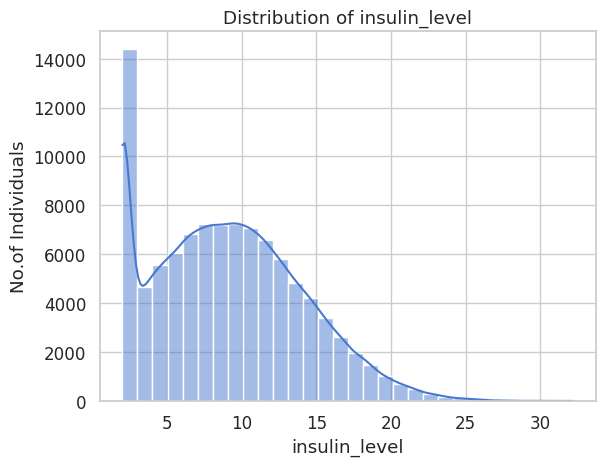

In [51]:
hist_func(df1,'insulin_level',30)

In [52]:
bins = [0, 5, 25, float('inf')]
labels = ['Low', 'Normal', 'High']

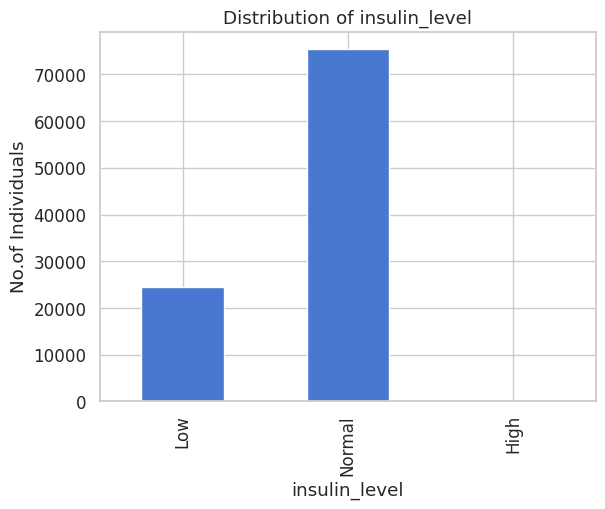

In [53]:
bar_plot(df1,'insulin_level',bins,labels)

#### HBA1C

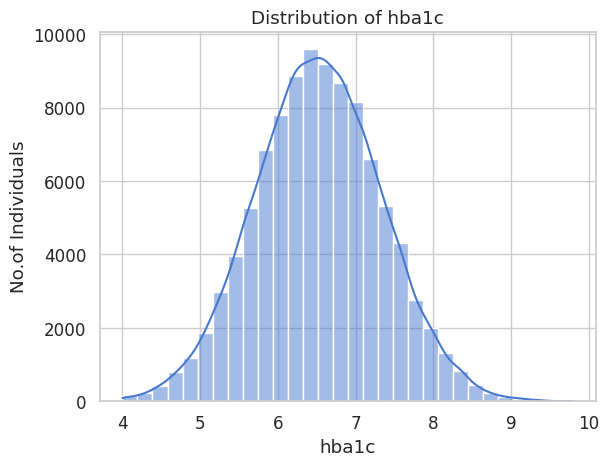

In [54]:
hist_func(df1,'hba1c',30)

In [55]:
bins = [0, 5.7, 6.5, float('inf')]
labels = ['Normal', 'Prediabetes', 'Diabetes']

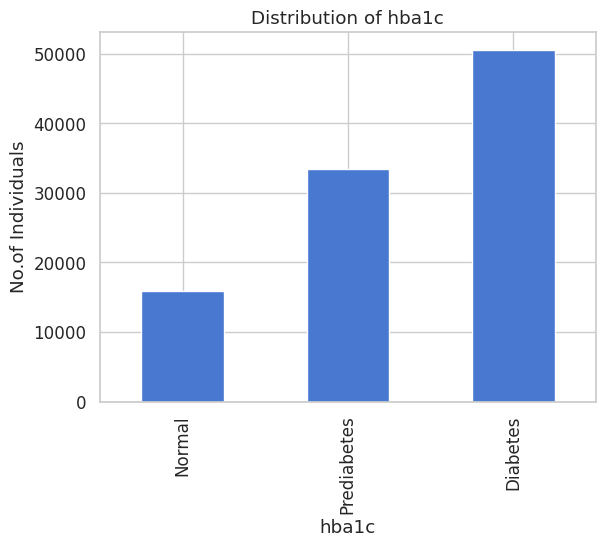

In [56]:
bar_plot(df1,'hba1c',bins,labels)

##### Insights
- More than 70% of patients have no Hypertension, Cardiovascular, or family diabetes history.
- Age is normally distributed, and most of the patients have age more than 40, but there patients who are in their teen years among top 10 age groups.
- Majority 54% are light drinkers, consumes 1-2 drinks per week, 13.5% don’t drink at all. Heavy drinkers are 5% with 5+ drinks per week.
- Average physical activity is 118 minutes per week, with right-skewed distribution, with some patients with no physical activity. 70% low physical activity (<150), there are some patients with high phsical activity (>300), but they are vary few.
- Majority (58%) are eating moderate diet, while 14% are having poor diet and are at highest risk.
- Majority clustered at 6–8 hours per day sleep.
- High and very high screen time together account for 64% of participants. Only a small fraction about 6% has low screen time.
- Overweight and Obese individuals are about 56% combined and 41% are Normal weight individuals.
- 14% individuals have high waist to hip ratio, and 49% individuals with low ratio, and 36% individuals have moderate ratio.
- Systolic BP is right-skewed, with 63% individuals having normal SBP.
- Diastolic BP is normally distributed, with majority clustering around 70-80 mmHg.
- Majority of individuals have total cholesterol in normal range, and only small fraction have high cholesterol.
- Only small portion of total individuals have low HDL Cholesterol, who are at higher risk.
- 21% individuals are at higher risk due to higher LDL Cholesterol, 48% have optimal LDL, with 30% having near optimal.
- The majority (75%) have triglycerides within the normal range. Almost (22%) are at borderline high and this group might show early signs of insulin resistence.
- According to Fasting & PostPrandial Glucose majority individuals are either in prediabetes or diabetes stage, with major chunk in prediabetes stage.
- Majority individuals have normal (5-25) Insulin levels. High insulin levels are extremely rare. Roughly one-quarter of the dataset, 1 in 4 individuals has low insulin.
- According to HbA1C half of the individuals are diabetic and 33.5% being in prediabetes stage and only 16% individuals have their HbA1C in normal range.
- Age, Diet Score, Sleep Hours per Day, BMI, WHR, Diastolic BP, Heart Rate, Cholesterol Total HDL, Glucose Fasting, Glucose Postprandial, HbA1C -> Normally Distributed
- Physical Activity Minutes per Week, Systolic BP, LDL Cholesterol, Triglycerides, Insulin Level -> Right-Skewed

##### 4.1.2 Categorical UniVariate Analysis

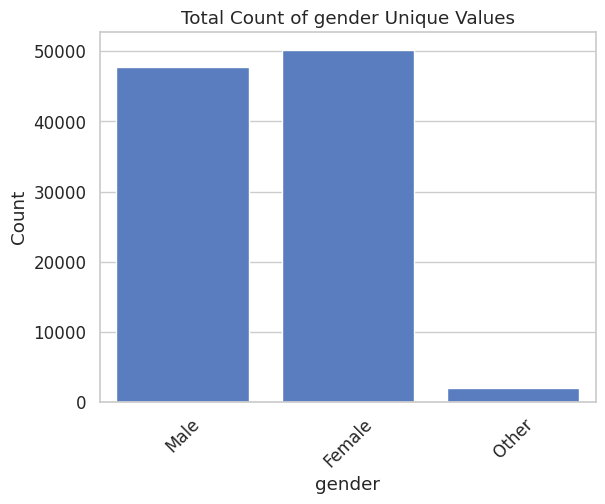

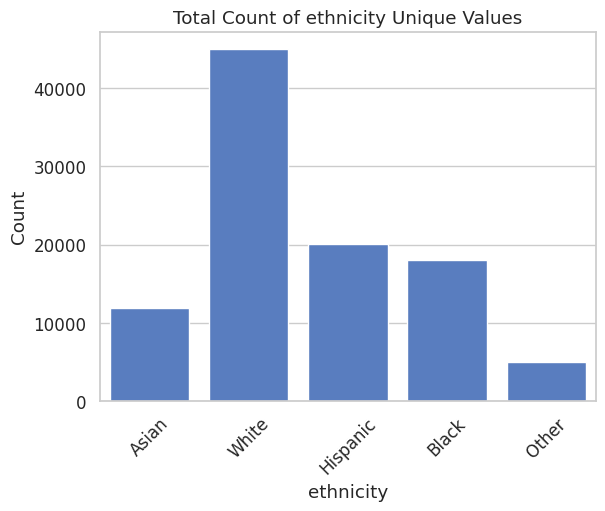

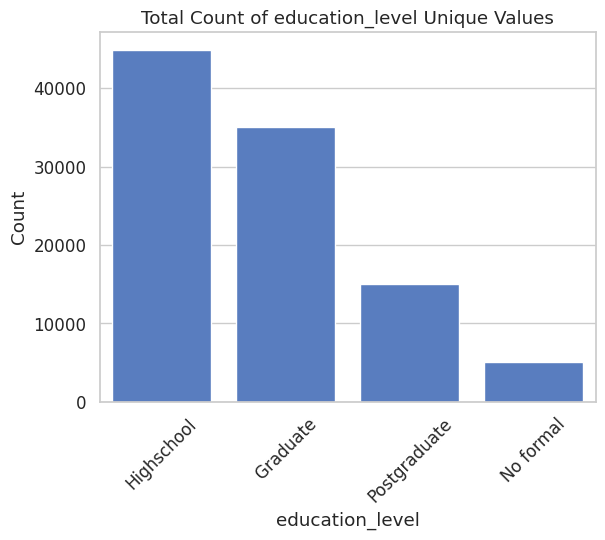

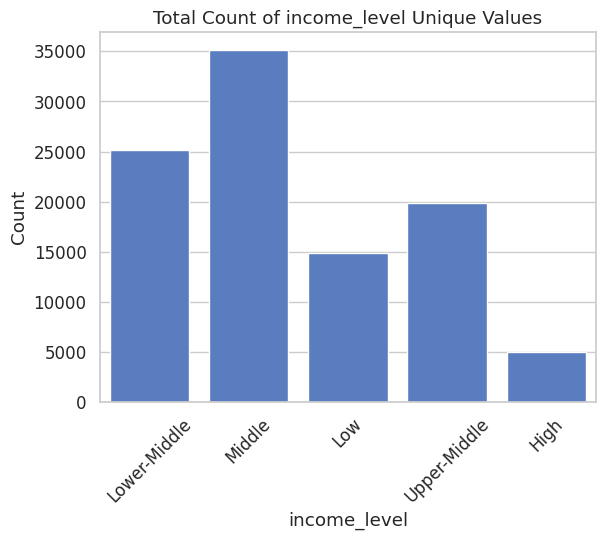

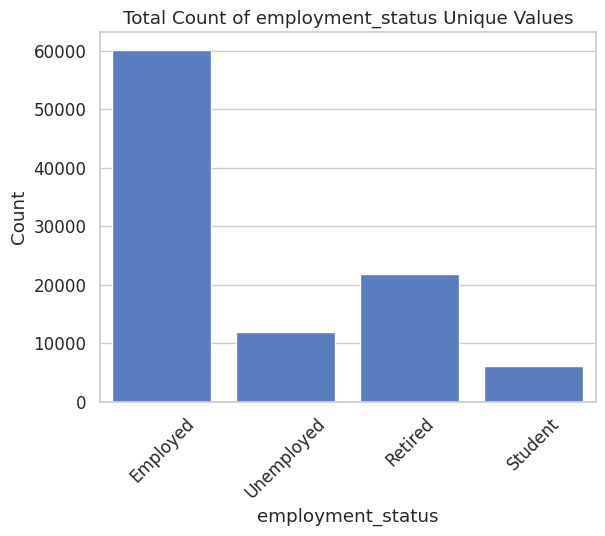

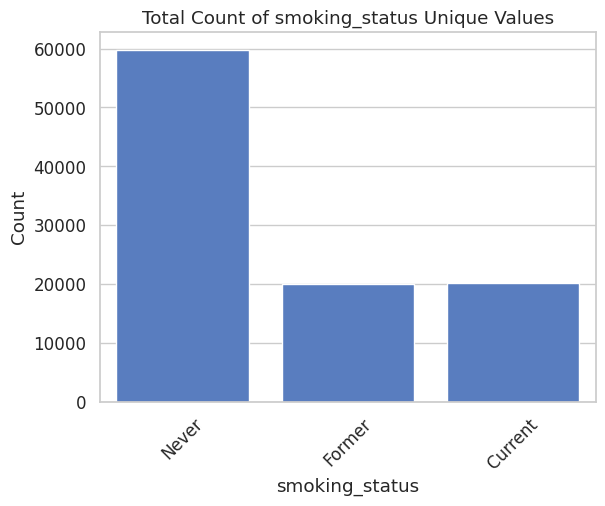

In [57]:
for col in cat_cols:
  sns.countplot(data=df1, x=col)
  plt.xlabel(f"{col}")
  plt.ylabel(f"Count")
  plt.xticks(rotation=45)
  plt.title(f"Total Count of {col} Unique Values")
  plt.show()

##### 4.2 BiVariate Analysis

##### 4.2.1 Numeric vs Numeric Bivariate Analysis

In [58]:
def num_bi_analysis(df,col1,col2):
  sns.scatterplot(data=df, x=col1, y=col2, alpha=0.6)
  sns.regplot(data=df, x=col1, y=col2, scatter=False, color='red')
  plt.xlabel(f'{col1}')
  plt.ylabel(f'{col2}')
  plt.title(f'{col1} vs {col2}')
  plt.show()

In [59]:
def calc_corr(df,col1,col2):
  correlation = df[[col1,col2]].corr().iloc[0,1]
  print(f'Correlation b/w {col1} & {col2} is : ', round(correlation,2))

##### glucose_fasting vs hba1c

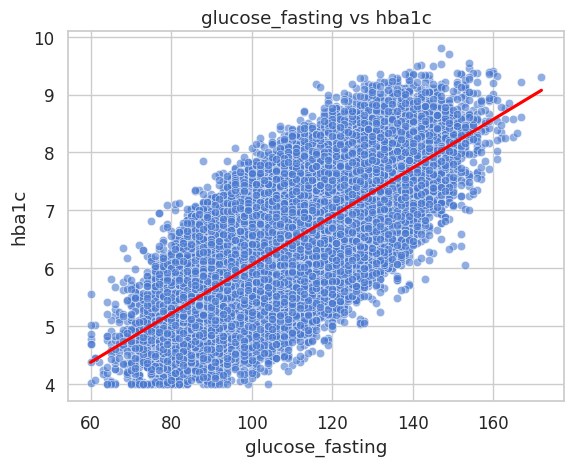

In [60]:
num_bi_analysis(df1,'glucose_fasting','hba1c')

In [61]:
calc_corr(df1,'glucose_fasting','hba1c')

Correlation b/w glucose_fasting & hba1c is :  0.7


##### glucose_postprandial vs hba1c

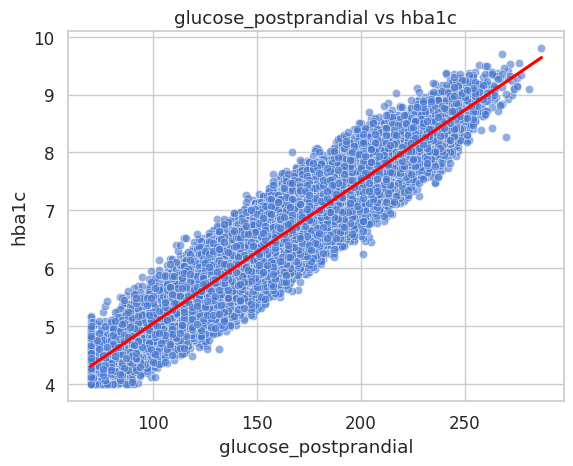

In [62]:
num_bi_analysis(df1,'glucose_postprandial','hba1c')

In [63]:
calc_corr(df1,'glucose_postprandial','hba1c')

Correlation b/w glucose_postprandial & hba1c is :  0.93


##### BMI vs waist_to_hip_ratio

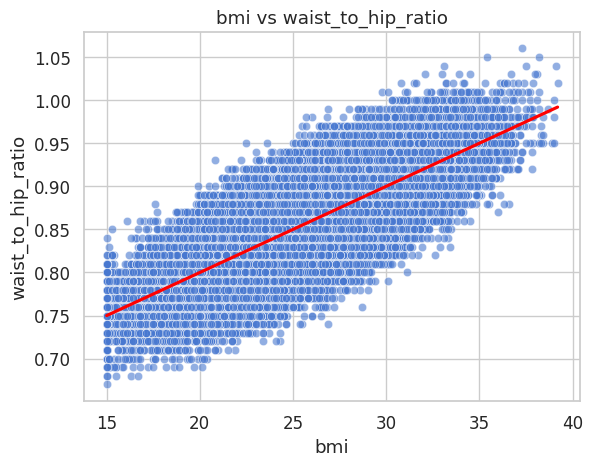

In [64]:
num_bi_analysis(df1,'bmi','waist_to_hip_ratio')

In [65]:
calc_corr(df1,'bmi','waist_to_hip_ratio')

Correlation b/w bmi & waist_to_hip_ratio is :  0.77


##### insulin_level vs glucose_fasting

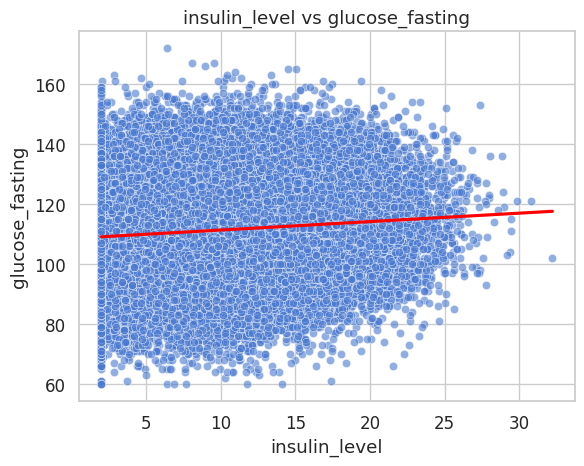

In [66]:
num_bi_analysis(df1,'insulin_level','glucose_fasting')

In [67]:
calc_corr(df1,'insulin_level','glucose_fasting')

Correlation b/w insulin_level & glucose_fasting is :  0.1


##### insulin_level vs glucose_postprandial

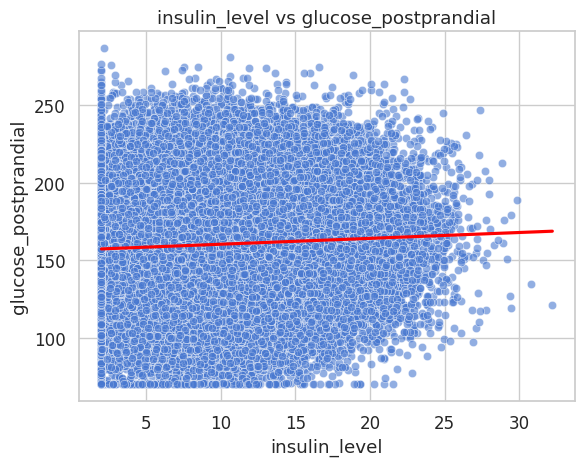

In [68]:
num_bi_analysis(df1,'insulin_level','glucose_postprandial')

In [69]:
calc_corr(df1,'insulin_level','glucose_postprandial')

Correlation b/w insulin_level & glucose_postprandial is :  0.06


##### triglycerides vs hdl_cholesterol

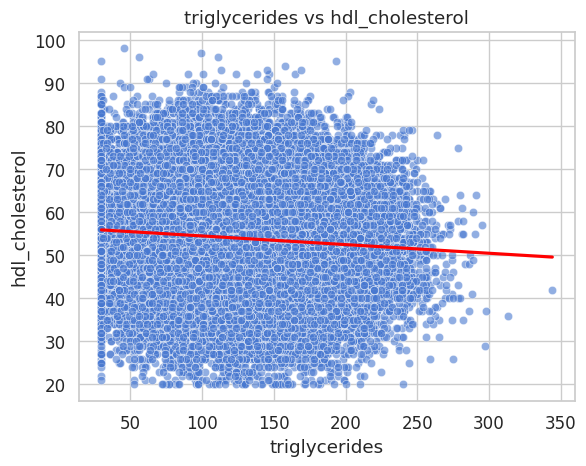

In [70]:
num_bi_analysis(df1,'triglycerides','hdl_cholesterol')

In [71]:
calc_corr(df1,'triglycerides','hdl_cholesterol')

Correlation b/w triglycerides & hdl_cholesterol is :  -0.08


#### Insights
- Fasting Glucose and HbA1C have positive correlation (0.70).
- Post Meal Glucose have a strong positive correlation (0.93) with HbA1C.
- BMI & WHR have positive correlation (0.77).
- Both Fasting & Post Meal Glucose didn't show any correlation with Insulin levels.
- Triglycerides & HDL Cholesterol have a very little negative correlation.

##### 4.2.2 Numeric vs Categorical Bivariate Analysis

In [72]:
def num_cat_bi_anlaysis(df,col1,col2):
  sns.boxplot(data=df, x=col1, y=col2)
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.title(f'{col2} Distribution Across {col1}')
  plt.show()

  return df.groupby(col1)[col2].mean()

##### BMI vs Gender

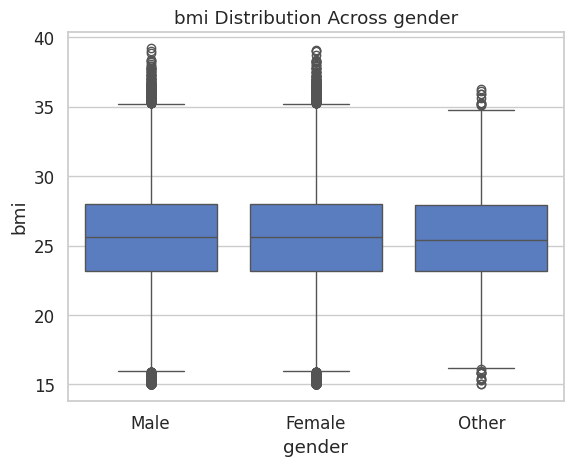

gender
Female    25.627404
Male      25.601794
Other     25.502385
Name: bmi, dtype: float64

In [73]:
num_cat_bi_anlaysis(df1,'gender','bmi')

##### Waist-to-Hip Ratio vs Gender

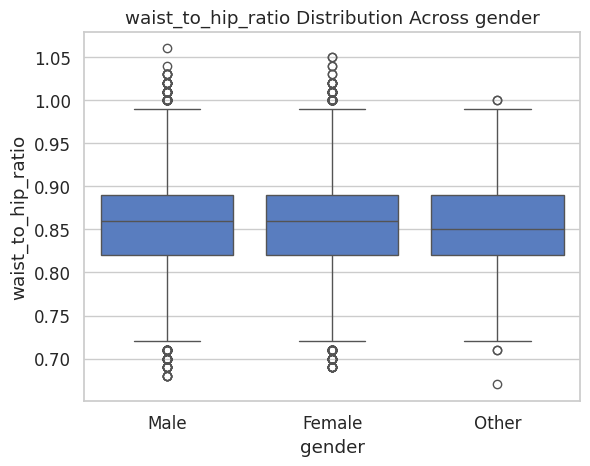

gender
Female    0.856197
Male      0.856021
Other     0.854456
Name: waist_to_hip_ratio, dtype: float64

In [74]:
num_cat_bi_anlaysis(df1,'gender','waist_to_hip_ratio')

##### Insulin Level vs Smoking Status

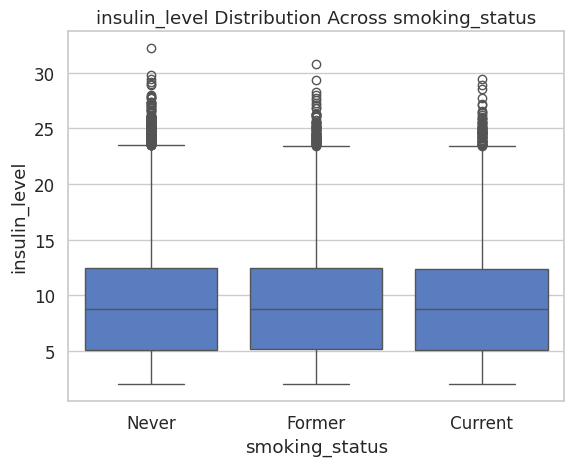

smoking_status
Current    9.036358
Former     9.090241
Never      9.059935
Name: insulin_level, dtype: float64

In [75]:
num_cat_bi_anlaysis(df1,'smoking_status','insulin_level')

##### Fasting Glucose vs Diet Score Category

In [76]:
ds_bins = [0, 4, 7, 11]
ds_labels = ['Poor', 'Moderate', 'Good']

In [77]:
temp_df = df1.copy()

In [78]:
temp_df['diet_score_cat'] = pd.cut(temp_df['diet_score'], bins=ds_bins, labels=ds_labels)
temp_df.head(2)

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   

   insulin_level  hba1c  diagnosed_diabetes diet_score_cat  
0           6.36   8.18                   1       Moderate  
1           2.00   5.63                   0       Moderate

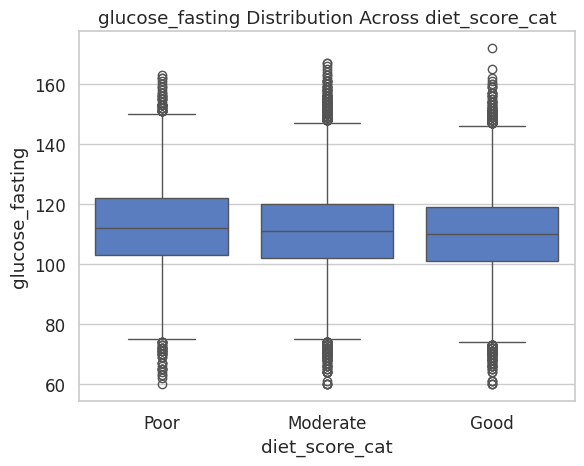

diet_score_cat
Poor        112.568326
Moderate    111.346863
Good        109.915918
Name: glucose_fasting, dtype: float64

In [79]:
num_cat_bi_anlaysis(temp_df,'diet_score_cat','glucose_fasting')

##### Postprandial Glucose vs Diet Score Category

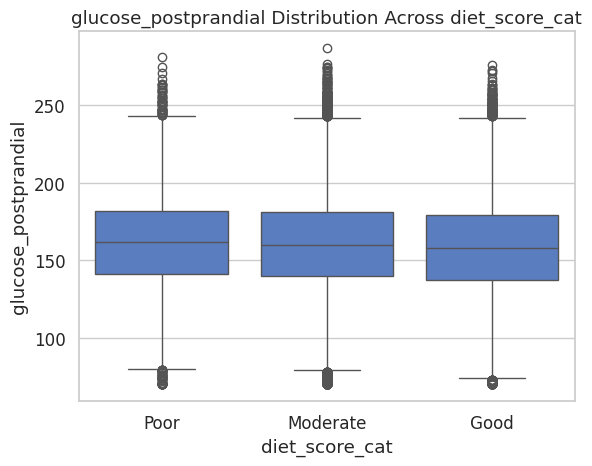

diet_score_cat
Poor        161.813558
Moderate    160.443099
Good        158.305033
Name: glucose_postprandial, dtype: float64

In [80]:
num_cat_bi_anlaysis(temp_df,'diet_score_cat','glucose_postprandial')

##### HbA1c vs Physical Activity Category

In [81]:
pa_bins = [0, 151, 301, float('inf')]
pa_labels = ['Low (<150)', 'Moderate (150-300)', 'High (>300)']

In [82]:
temp_df['physical_activity_per_week_cat'] = pd.cut(temp_df['physical_activity_minutes_per_week'], bins=pa_bins, labels=pa_labels)
temp_df.head(2)

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   

   insulin_level  hba1c  diagnosed_diabetes diet_score_cat  \
0           6.36   8.18                   1       Moderate   
1           2.00   5.63                   0       Moderate   

  physical_activity_per_week_cat  
0             Moderate (150-300)  
1                     Low (<150)

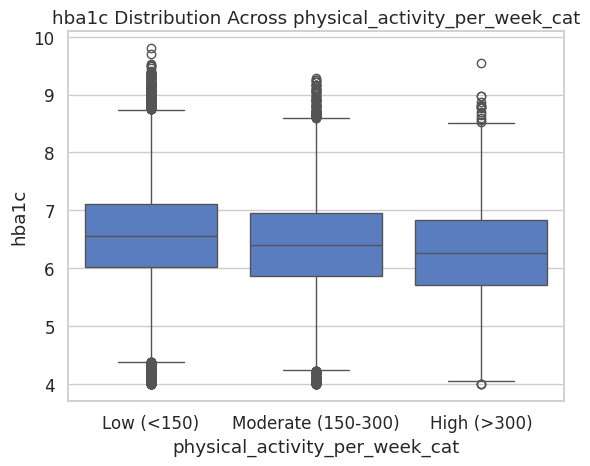

physical_activity_per_week_cat
Low (<150)            6.568387
Moderate (150-300)    6.415941
High (>300)           6.281751
Name: hba1c, dtype: float64

In [83]:
num_cat_bi_anlaysis(temp_df,'physical_activity_per_week_cat','hba1c')

##### Insights
- Overall BMI distribution is very similar across Gender. They have similar level of average obesity, they are similarly exposed to the risk of diabetes.
- Distribution of WHR across Gender is similar.
- Insulin level distribution is similar for each Smoking status.
- Fasting & Postmeal glucose is little bit lower on average for an individual taking good diet as compared to moderated or poor diet.
- Higher weekly physical activity results in progressively lower mean HbA1c levels.

##### 4.2.3 Categorical vs Categorical Bivariate Analysis

In [84]:
def cat_cat_bi_analysis(df,col1,col2):
  cat_prop = pd.crosstab(df[col1], df[col2], normalize='index') * 100
  print(cat_prop)

  cat_prop.plot(kind='bar', stacked=True, color=['steelblue', 'orange'])
  plt.ylabel('Percentage')
  plt.title(f'Diabetes Prevalence by {col1}')
  plt.legend(title='Diagnosed Diabetes', loc='upper right')
  plt.show()

##### Gender vs Diagnosed Diabetes

diagnosed_diabetes          0          1
gender                                  
Female              40.154532  59.845468
Male                39.934270  60.065730
Other               37.804272  62.195728


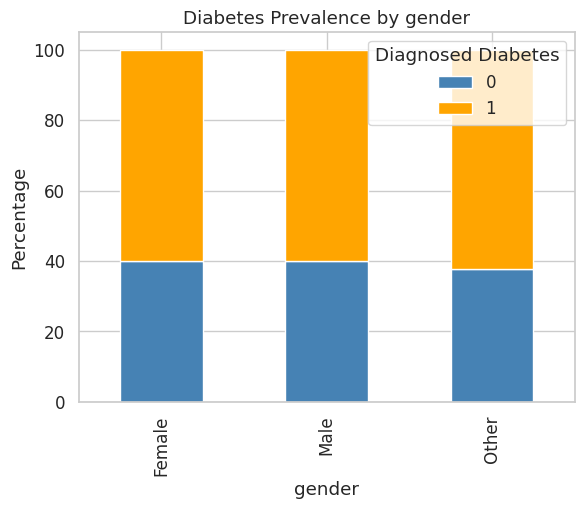

In [85]:
cat_cat_bi_analysis(df1,'gender','diagnosed_diabetes')

##### Ethnicity vs Diagnosed Diabetes

diagnosed_diabetes          0          1
ethnicity                               
Asian               39.924147  60.075853
Black               39.858779  60.141221
Hispanic            40.605880  59.394120
Other               39.235492  60.764508
White               39.895993  60.104007


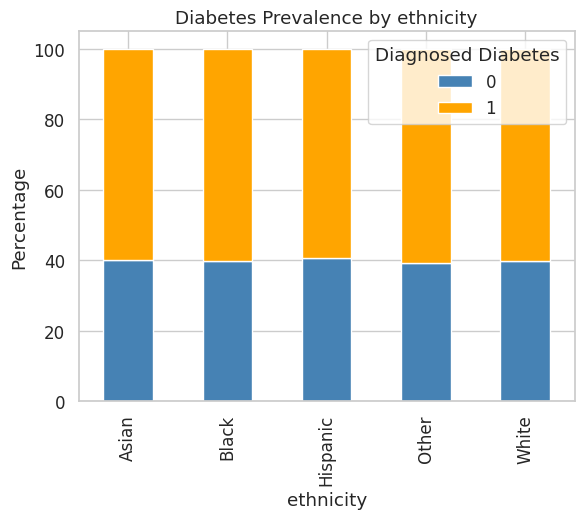

In [86]:
cat_cat_bi_analysis(df1,'ethnicity','diagnosed_diabetes')

##### Smoking Status vs Diagnosed Diabetes

diagnosed_diabetes          0          1
smoking_status                          
Current             39.993061  60.006939
Former              39.888062  60.111938
Never               40.043134  59.956866


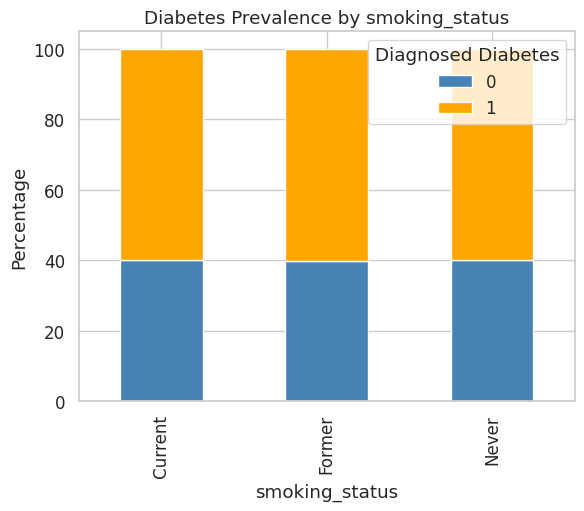

In [87]:
cat_cat_bi_analysis(df1,'smoking_status','diagnosed_diabetes')

##### Alcohol Consumption Category vs Diagnosed Diabetes

In [88]:
alcohol_bins = [-0.01, 4, 7, float('inf')]
alcohol_labels = ['Low', 'Moderate', 'High']

In [89]:
temp_df['alcohol_consumption_per_week_cat'] = pd.cut(temp_df['alcohol_consumption_per_week'], bins=alcohol_bins, labels=alcohol_labels)
temp_df.head(2)

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   

   insulin_level  hba1c  diagnosed_diabetes diet_score_cat  \
0           6.36   8.18                   1       Moderate   
1           2.00   5.63                   0       Moderate   

  physical_activity_per_week_cat alcohol_consumption_per_week_cat  
0             Moderate (150-300)                              Low  
1                     Low (<150)                              Low

diagnosed_diabetes                        0          1
alcohol_consumption_per_week_cat                      
Low                               39.967044  60.032956
Moderate                          40.478469  59.521531
High                              48.039216  51.960784


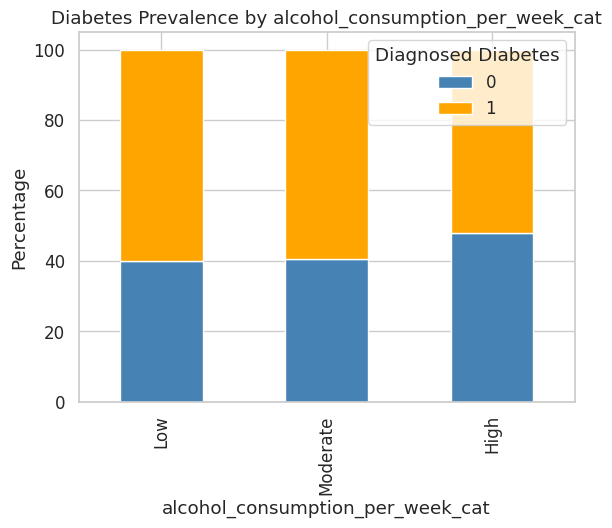

In [90]:
cat_cat_bi_analysis(temp_df,'alcohol_consumption_per_week_cat','diagnosed_diabetes')

##### Family History of Diabetes vs Diagnosed Diabetes

diagnosed_diabetes               0          1
family_history_diabetes                      
0                        45.142777  54.857223
1                        21.712775  78.287225


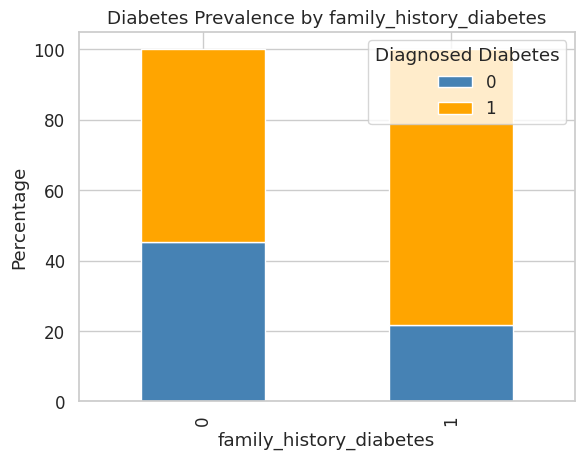

In [91]:
cat_cat_bi_analysis(df1,'family_history_diabetes','diagnosed_diabetes')

##### History of Hypertension vs Diagnosed Diabetes

diagnosed_diabetes            0          1
hypertension_history                      
0                     40.782168  59.217832
1                     37.671451  62.328549


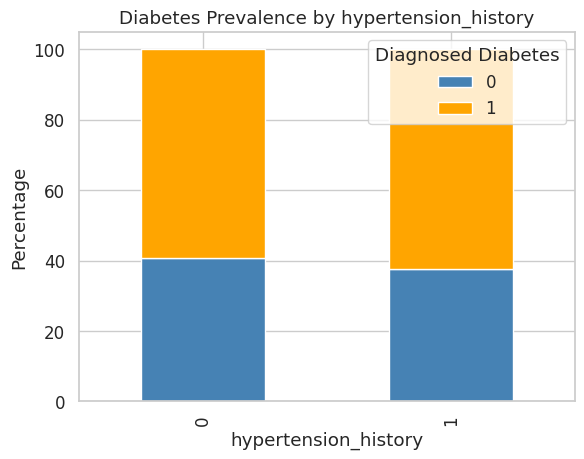

In [92]:
cat_cat_bi_analysis(df1,'hypertension_history','diagnosed_diabetes')

diagnosed_diabetes              0          1
cardiovascular_history                      
0                       40.430061  59.569939
1                       35.025253  64.974747


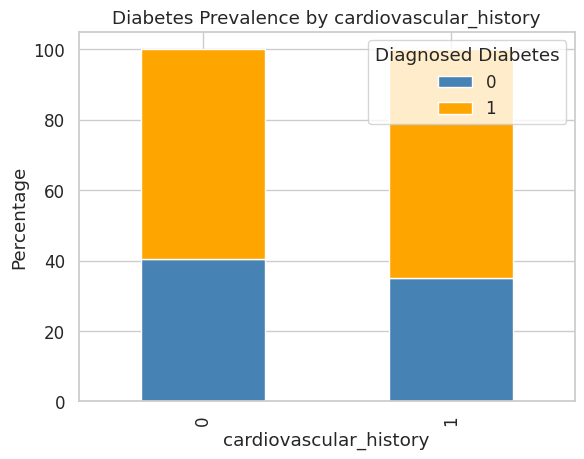

In [93]:
cat_cat_bi_analysis(df1,'cardiovascular_history','diagnosed_diabetes')

##### Insights
- Diagnosed diabetes ratio was similar among males and females, while individuals in the “Other” gender category have a slightly higher ratio.
- Diagnosed diabetes ratio is similar across ethnic groups, with only minor differences.
- There is only minimal differences in diagnosed diabetes across smoking status categories.
- Compared to low and moderate drinkers, high alcohol consumption is associated with a lower proportion of diagnosed diabetes in this data, this is because we have few individuals in high alcohol consumption category.
- Diagnosed diabetes is much higher among individuals with a family history of diabetes compared with those without family diabetes history.
- Individuals with the history of hypertension have a slightly higher chance (3%) of being diagnosed as diabetic.
- Individuals with cardiovascular history have a higher chance, 6% more than who don't have history of being diagnosed as diabetic.

##### 4.3 Correlation Matrix

<Axes: >

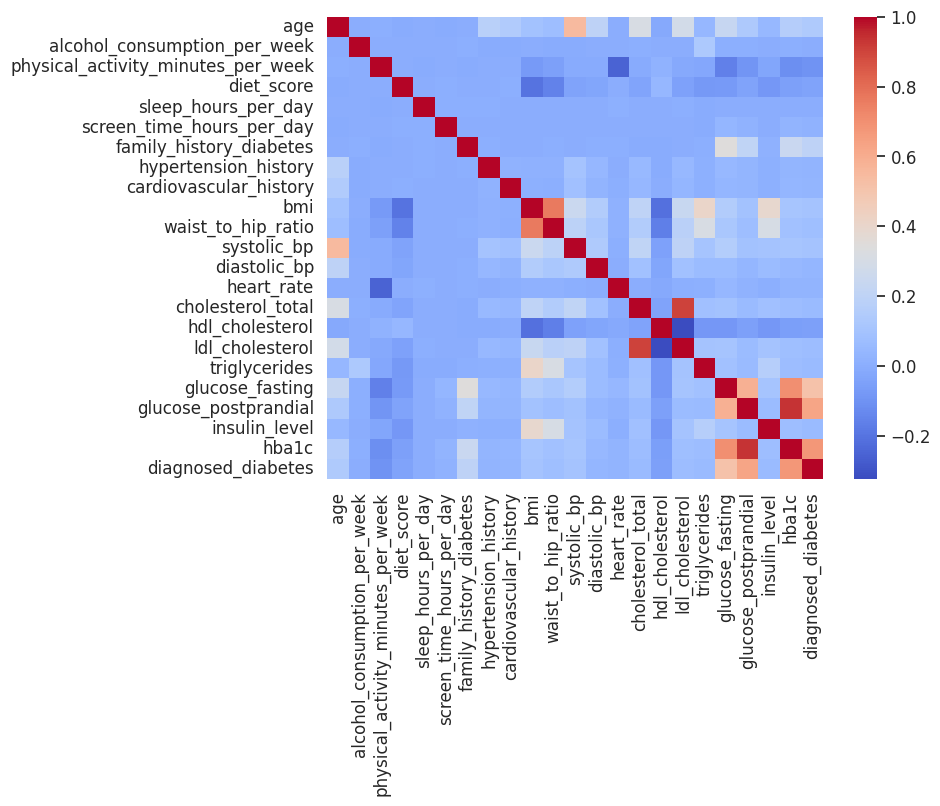

In [95]:
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(numeric_only=True), cmap='coolwarm')

#### Chaecking for Outliers

In [101]:
def check_outliers(df,col,lower,upper):
  outlier_val = df1[(df1['hba1c'] < 4) | (df1['hba1c'] > 18)]
  return outlier_val.shape[0]

In [108]:
check_outliers(df1,'systolic_bp',80,260)

0

##### Insights
- There are no outliers in this data, which are out of the clinical bounds.

### Next Steps
#### Scaling
- RobustScaler(median + IQR) for skewed variables.
- Standard Scaler for normally continuous variables, also for variables with bounds.
- Categorical variables OneHotEncoding.
- Binary variables no scaling.

### Feature Engineering

In [109]:
df2 = df1.copy()
df2.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   
2                                  57         6.4                 10.0   
3                                  49         3.4                  6.6   
4                                 109         7.2                  7.4   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   
2                        8.1                        1                     0   
3                        5.2                        0                     0   
4                        5.0                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   
2                       0  22.2                0.81          115   
3                       0  26.8                0.88          120   
4                       0  21.2                0.78           92   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   
2            73          74                213               66   
3            93          68                171               50   
4            67          67                210               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diagnosed_diabetes  
0           6.36   8.18                   1  
1           2.00   5.63                   0  
2           5.07   7.51                   1  
3           5.28   9.03                   1  
4          12.74   7.20                   1

HOMA-IR (Homeostatic Model Assessment of Insulin Resistance)
- Gold-standard proxy for insulin resistance
- High HOMA-IR often precedes overt diabetes

In [111]:
df2['homa_ir'] = (df2['glucose_fasting'] * df2['insulin_level']) / 405

TG/HDL Ratio (Atherogenic & Insulin Resistance Marker)
- High ratio → insulin resistance + cardiovascular risk

In [113]:
df2['tg_hdl_ratio']= df2['triglycerides'] / df2['hdl_cholesterol']

Glycemic Gap (Postprandial Stress Indicator)
- Captures meal-induced glucose spikes
- Useful for early diabetes detection

In [115]:
df2['glysemic_gap'] = df2['glucose_postprandial'] - df2['glucose_fasting']

Mean Arterial Pressure (MAP)
- Better cardiovascular load indicator than raw BP
- Hypertension synergizes with diabetes risk

In [117]:
df2['mean_arterial_pressure'] = (2 * df2['diastolic_bp'] + df2['systolic_bp']) / 3

Obesity Risk Index (BMI × WHR Interaction)
- Strong predictor of insulin resistance

In [119]:
df2['obesity_risk_index'] = df2['bmi'] * df2['waist_to_hip_ratio']

Lifestyle Load Score (Behavioral Risk Aggregation)
- Low physical activity
- Poor diet
- High screen time
- High score → elevated diabetes risk independent of BMI

In [121]:
df2['lifestyle_risk_score'] = (
    (1 / (df2['physical_activity_minutes_per_week'] + 1)) +
    (1 / (df2['diet_score'] + 1)) +
    df2['screen_time_hours_per_day']
)

Cardiometabolic Burden Flag

Binary indicator if ≥2 major risk factors present:
- Hypertension
- Dyslipidemia
- Obesity

In [123]:
df2['cardiometabolic_burden'] = (
    (df2['hypertension_history'] == 1).astype(int) +
    (df2['tg_hdl_ratio'] > 3).astype(int) +
    (df2['bmi'] > 30).astype(int)
    >= 2
).astype(int)

In [124]:
df2.head()

age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                                 215         5.7                  7.9   
1                                 143         6.7                  6.5   
2                                  57         6.4                 10.0   
3                                  49         3.4                  6.6   
4                                 109         7.2                  7.4   

   screen_time_hours_per_day  family_history_diabetes  hypertension_history  \
0                        7.9                        0                     0   
1                        8.7                        0                     0   
2                        8.1                        1                     0   
3                        5.2                        0                     0   
4                        5.0                        0                     0   

   cardiovascular_history   bmi  waist_to_hip_ratio  systolic_bp  \
0                       0  30.5                0.89          134   
1                       0  23.1                0.80          129   
2                       0  22.2                0.81          115   
3                       0  26.8                0.88          120   
4                       0  21.2                0.78           92   

   diastolic_bp  heart_rate  cholesterol_total  hdl_cholesterol  \
0            78          68                239               41   
1            76          67                116               55   
2            73          74                213               66   
3            93          68                171               50   
4            67          67                210               52   

   ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0              160            145              136                   236   
1               50             30               93                   150   
2               99             36              118                   195   
3               79            140              139                   253   
4              125            160              137                   184   

   insulin_level  hba1c  diagnosed_diabetes   homa_ir  tg_hdl_ratio  \
0           6.36   8.18                   1  2.135704      3.536585   
1           2.00   5.63                   0  0.459259      0.545455   
2           5.07   7.51                   1  1.477185      0.545455   
3           5.28   9.03                   1  1.812148      2.800000   
4          12.74   7.20                   1  4.309580      3.076923   

   glysemic_gap  mean_arterial_pressure  obesity_risk_index  \
0           100               96.666667              27.145   
1            57               93.666667              18.480   
2            77               87.000000              17.982   
3           114              102.000000              23.584   
4            47               75.333333              16.536   

   lifestyle_risk_score  cardiometabolic_burden  
0              8.053883                       1  
1              8.836815                       0  
2              8.252377                       0  
3              5.447273                       0  


In [127]:
df2.to_csv('diabetes_data_fe.csv', index=False)